# IVF (Inverted File Index)

We've talked earlier about methods like LSH, ANNOY, PQ which use some kind of hash, tree, and quantization respectively to speed up vector search

In terms of the actual way the indices are stored in the database, there are two options

1) Flat Index
2) Inverted File Index



A flat index is by and large the most basic indexing strategy, but arguably also the most overlooked. With flat indexing, we compare a query vector with every other vector in our database

For small indexes, this is fine, however, it doesn't scale for large indexes

By trading off a bit of accuracy/recall for improved runtime, we can significantly improve both query speed and throughput
This is where IVF comes in

An inverted file index reduces the overall search scope by arranging the entire dataset into partitions. All partitions are associated with a centroid, and every vector in the dataset is assigned to a partition that corresponds to its nearest centroid

That's it

Your index is created like so

Index[centroid 1] = [v_point1, v_point2, v_point 3...]
Index[centroid_2] = [v_point4, v_point5, v_point 6...]
...

Index[centroid_K] = [v_point255, v_point5454, v_point 622...]

assuming K partitions/centroids

The key to the index is the centroid of the partition, and the values are all the vectors of all the points belonging to that partition

When a new query comes in, you first check which centroid it is closest to (this is of Order complexity D * K rather than D * N, where D is the dimensionality of the vectors and K the no of centroids, N the total no of data points

Once you find out which partition the query should be in, do a regular distance computation of query against all the points in that partition alone

(You can expand to neighbouring partitions to handle edge cases)

Given these set of points in 2 dimensions

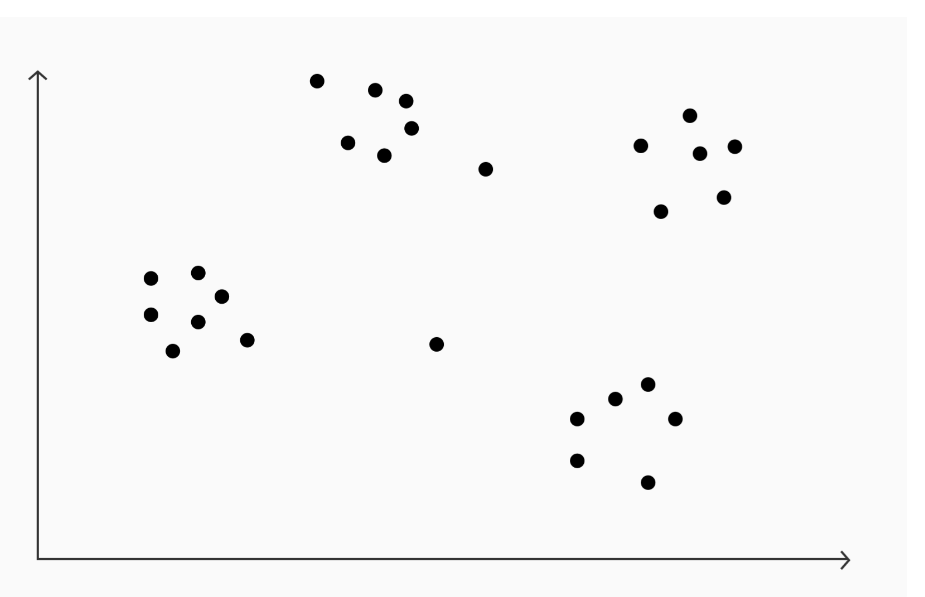

you first find the centroids using K-means

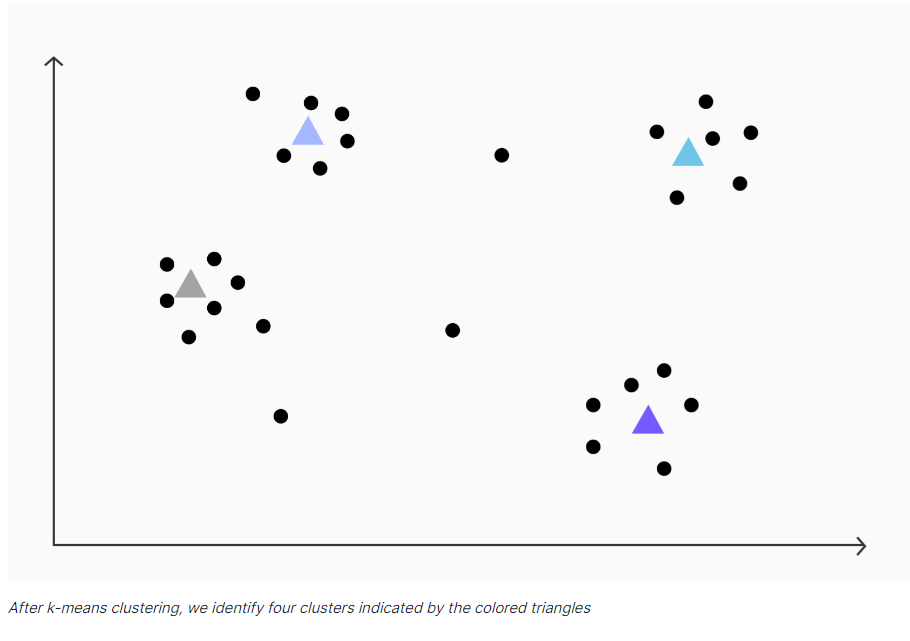

Then assign every point to its nearest neighbours, to get the following voronoi diagrams

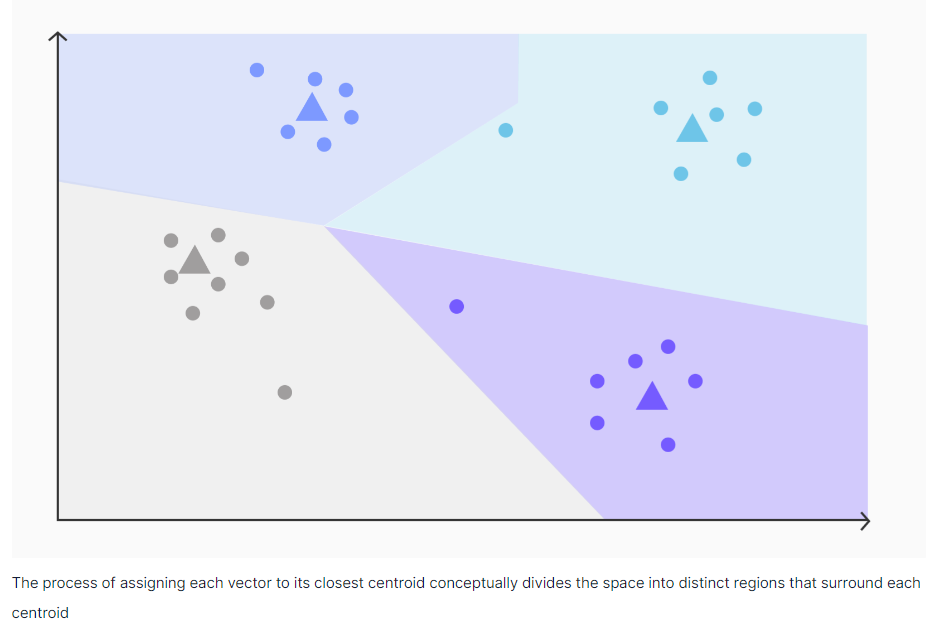

Now, given a new query, we want to find its nearest neighbours

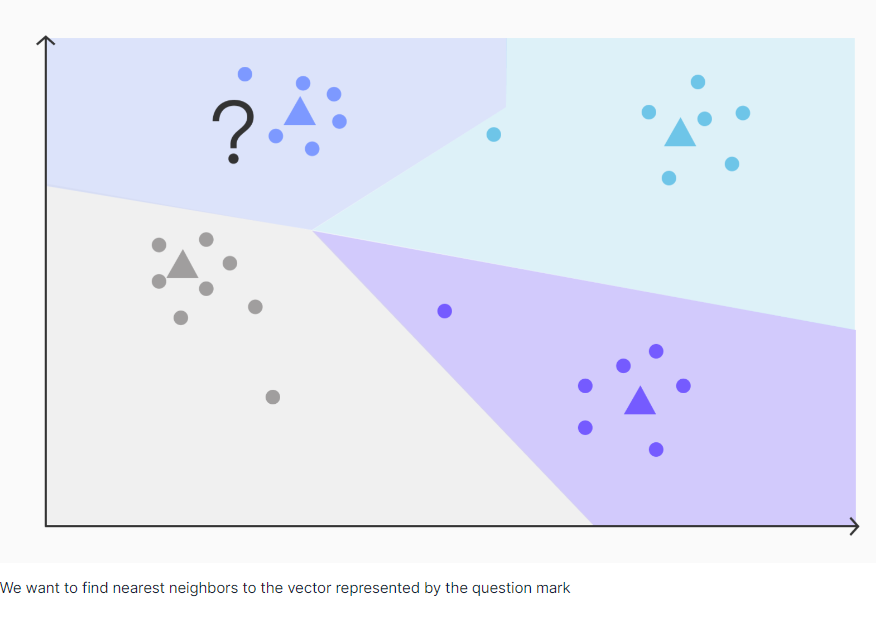

First find the partition / voronoi cell the new query is in by comparing against centroids of all cells

Once you Identify the cell, compare query with all points in that cell using the Inverted File Index to find the closest points

## References

1) https://zilliz.com/learn/vector-index - A nice explanation
2) https://www.timescale.com/blog/nearest-neighbor-indexes-what-are-ivfflat-indexes-in-pgvector-and-how-do-they-work/ - Nice